In [1]:
from pyecharts.charts import Bar
from pyecharts import options as opts
bar = (
 Bar(init_opts=opts.InitOpts())
 .add_xaxis(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
 .add_yaxis("Temperature Max", [-7,-6,-2,4,10,15,18,17,13,7,2,-3])
 .add_yaxis("Temperature Min", [-1,0,5,12,18,24,27,26,21,14,8,2])
 .set_global_opts(title_opts=opts.TitleOpts(title="30-year temperature for Toronto", subtitle="Year 1981 to 2010"))
)
bar.render_notebook()

In [2]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType
bar = (
 Bar(init_opts=opts.InitOpts(theme=ThemeType.PURPLE_PASSION))
 .add_xaxis(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
 .add_yaxis("Temperature Max", [-7,-6,-2,4,10,15,18,17,13,7,2,-3])
 .add_yaxis("Temperature Min", [-1,0,5,12,18,24,27,26,21,14,8,2])
 .set_global_opts(title_opts=opts.TitleOpts(title="30-year temperature for Toronto", subtitle="Year 1981 to 2010"))
)
bar.render_notebook()

In [3]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image data
])

# Set the paths for the datasets
base_folder = "../datasets/vision/Vision_data"
train_folder = os.path.join(base_folder, "train")
test_folder = os.path.join(base_folder, "test")
validation_folder = os.path.join(base_folder, "validation")

# Create datasets
train_dataset = ImageFolder(root=train_folder, transform=transform)
test_dataset = ImageFolder(root=test_folder, transform=transform)
validation_dataset = ImageFolder(root=validation_folder, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)


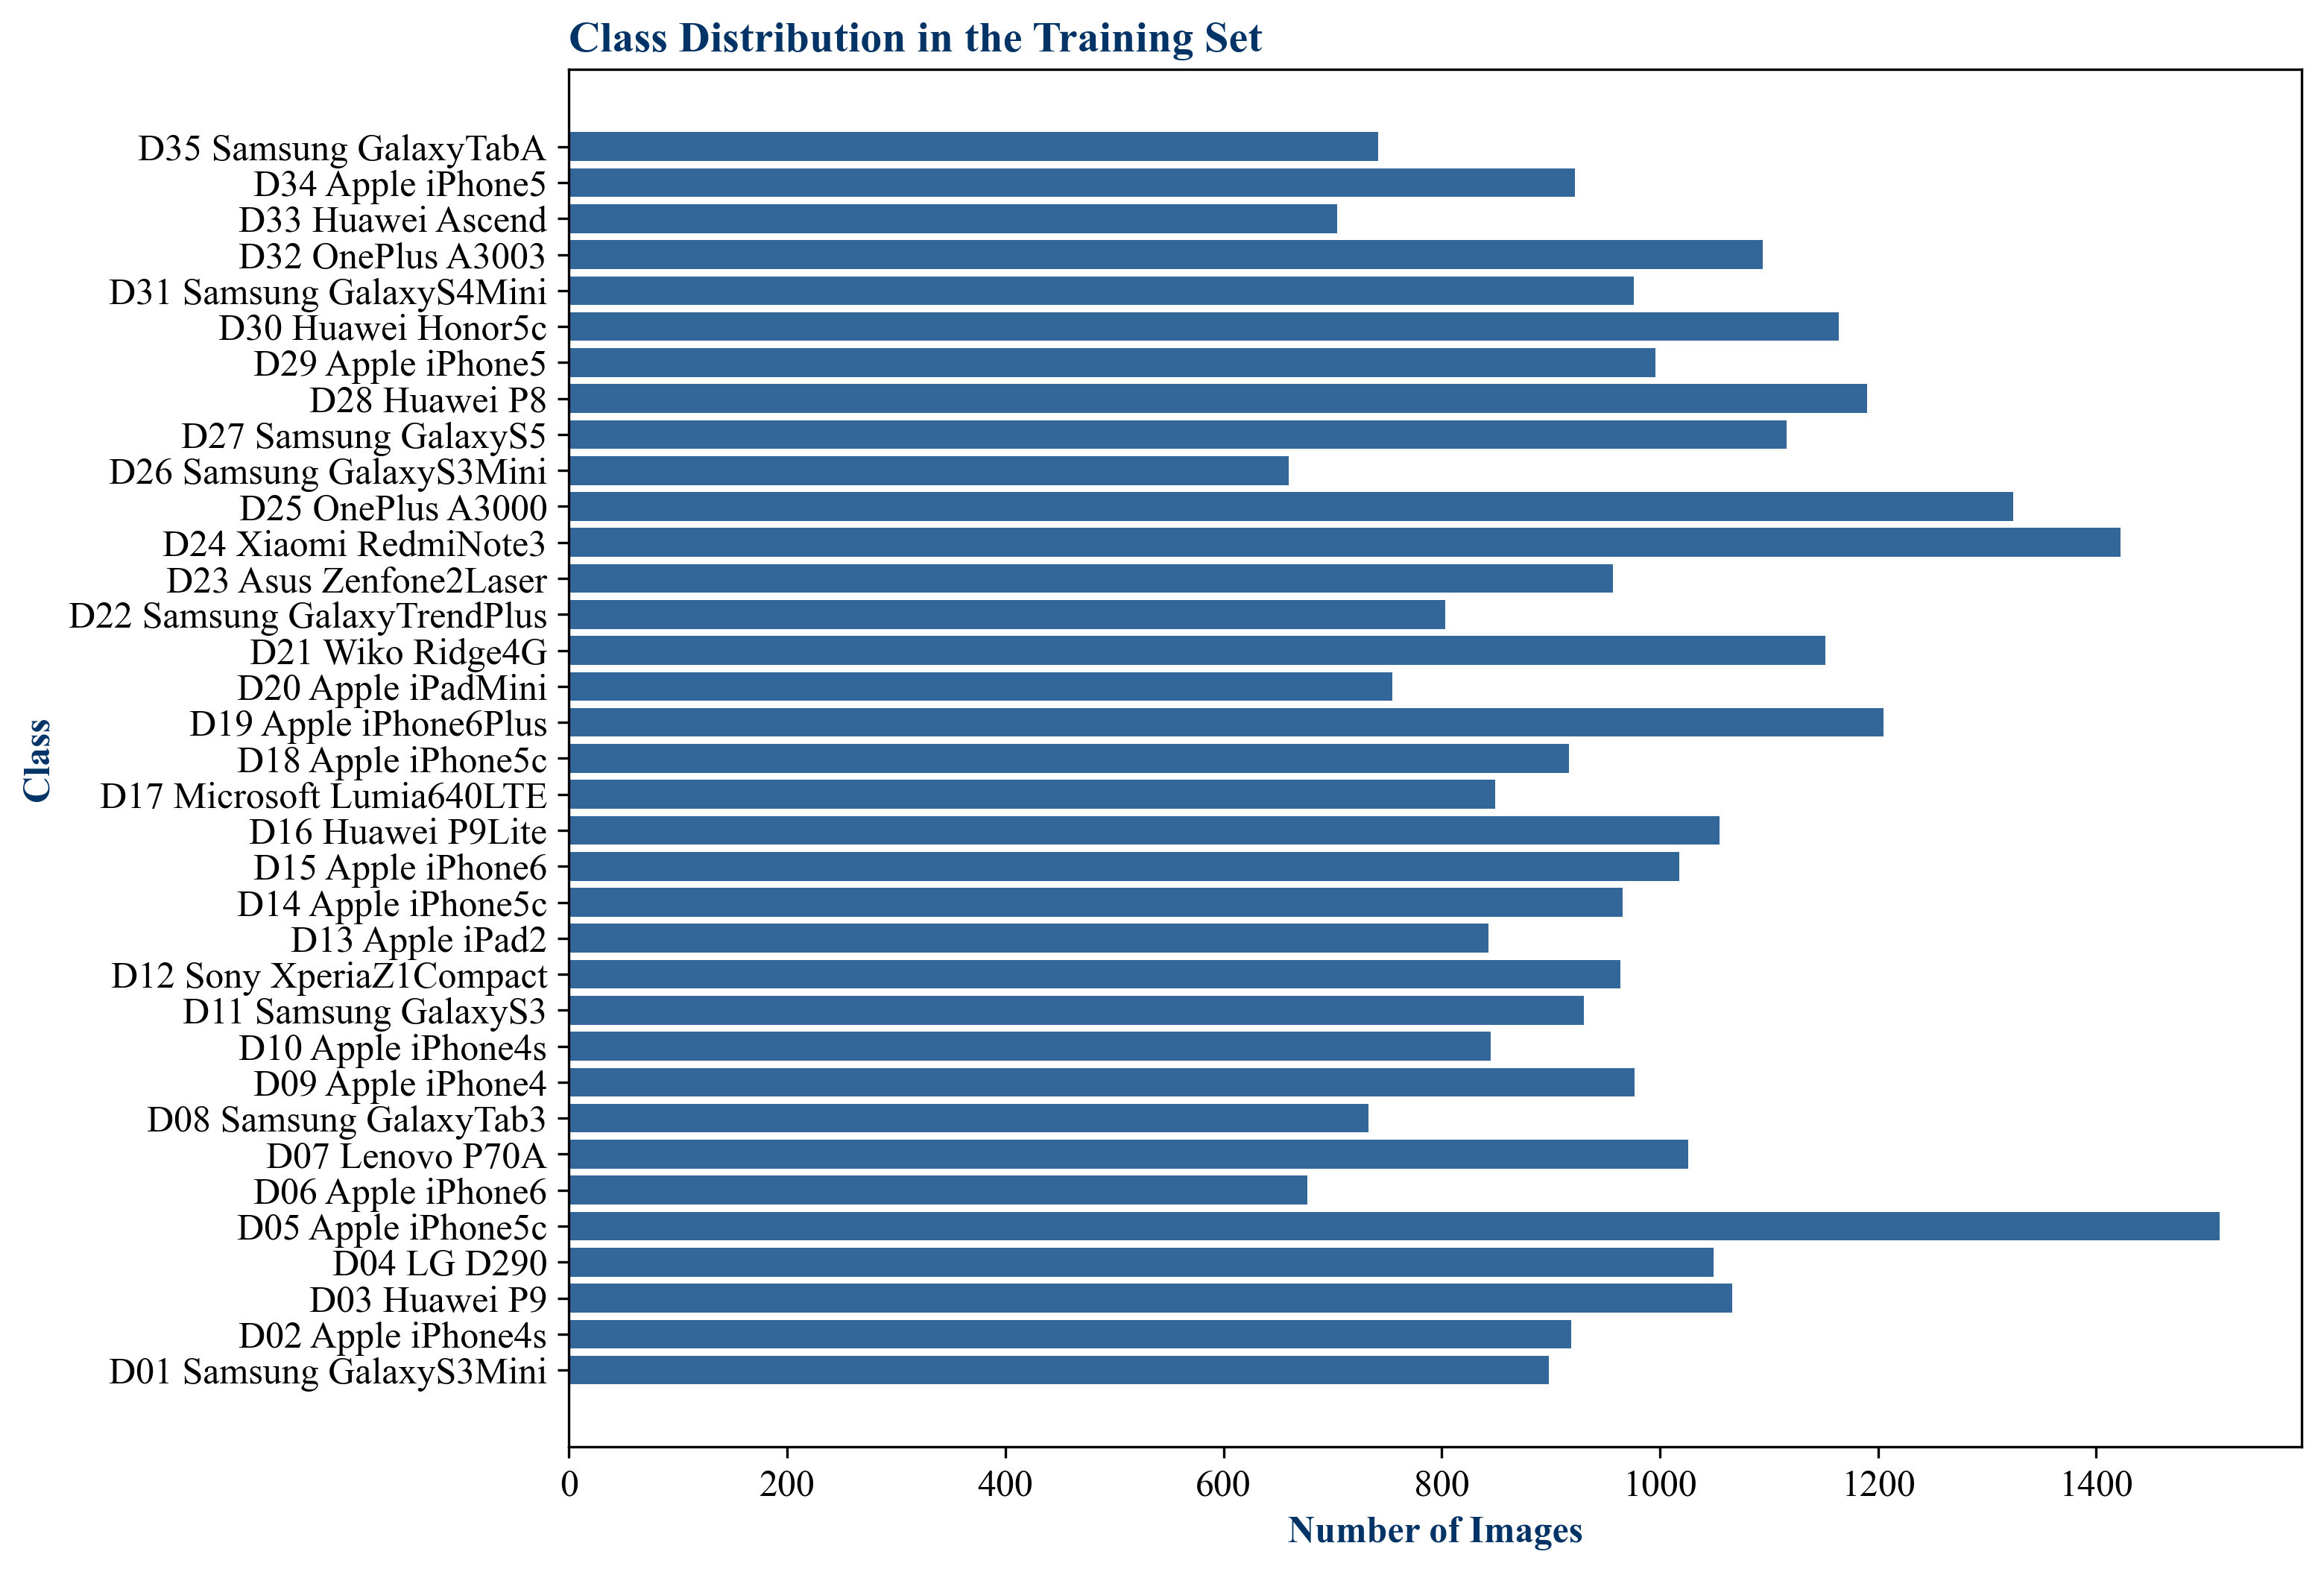

In [26]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the number of images per class in the training dataset
class_counts = Counter(train_dataset.targets)

# Plot the class distribution in a horizontal bar chart
plt.figure(figsize=(10, 8), dpi=300)
plt.barh([train_dataset.classes[i].replace("_", " ") for i in range(len(train_dataset.classes))], 
         [class_counts[i] for i in range(len(train_dataset.classes))],
         color='#336699')  # Set the color for the bars

# Customize axis labels
plt.xlabel('Number of Images', fontsize=12, fontweight='bold', fontname='Times New Roman', color='#003366')
plt.ylabel('Class', fontsize=12, fontweight='bold', fontname='Times New Roman', color='#003366')

# Customize axis tick labels
plt.xticks(fontsize=12, fontname='Times New Roman') # fontstyle='italic', 
plt.yticks(fontsize=12, fontname='Times New Roman') # fontstyle='italic', 

# Customize title
plt.title('Class Distribution in the Training Set', fontsize=14, fontweight='bold', color='#003366', loc='left', fontname='Times New Roman')

# Save the figure
output_folder = "../output/"
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, "class_distribution.jpg"), format='jpg', dpi=300)
plt.savefig(os.path.join(output_folder, "class_distribution.pdf"), format='pdf', dpi=300)

plt.show()


In [30]:
from pyecharts.charts import Bar
from pyecharts import options as opts
from collections import Counter

# Count the number of images per class in the training dataset
class_counts = Counter(train_dataset.targets)

# Prepare data for the bar chart
categories = [train_dataset.classes[i].replace("_", " ") for i in range(len(train_dataset.classes))]
values = [class_counts[i] for i in range(len(train_dataset.classes))]

# Creating the bar chart
bar = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add_xaxis(categories)
    .add_yaxis("Number of Images", values, color='#336699')
    # .reversal_axis()  # To make the bar chart horizontal
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Class Distribution in the Training Set"),
        yaxis_opts=opts.AxisOpts(name="Number of Images",
            axislabel_opts=opts.LabelOpts(margin=20, font_weight="bold"),
        ),
        xaxis_opts=opts.AxisOpts(name="Class",
            axislabel_opts=opts.LabelOpts(font_weight="bold",rotate=45, margin=15)
        ),
        legend_opts=opts.LegendOpts(is_show=False)
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#336699')  # Set color for each bar
    )
)

# Render the chart to an HTML file
bar.render_notebook()


In [27]:
# To save as an image or PDF, you need to install snapshot-selenium or snapshot-phantomjs
bar.render("../output/class_distribution.jpg")  # Save as PNG
bar.render("../output/class_distribution.pdf")  # Save as PDF

# Render the chart to an HTML file
bar.render("../output/class_distribution.html")

'e:\\Repositories\\CameraSourceDetection\\output\\class_distribution.html'

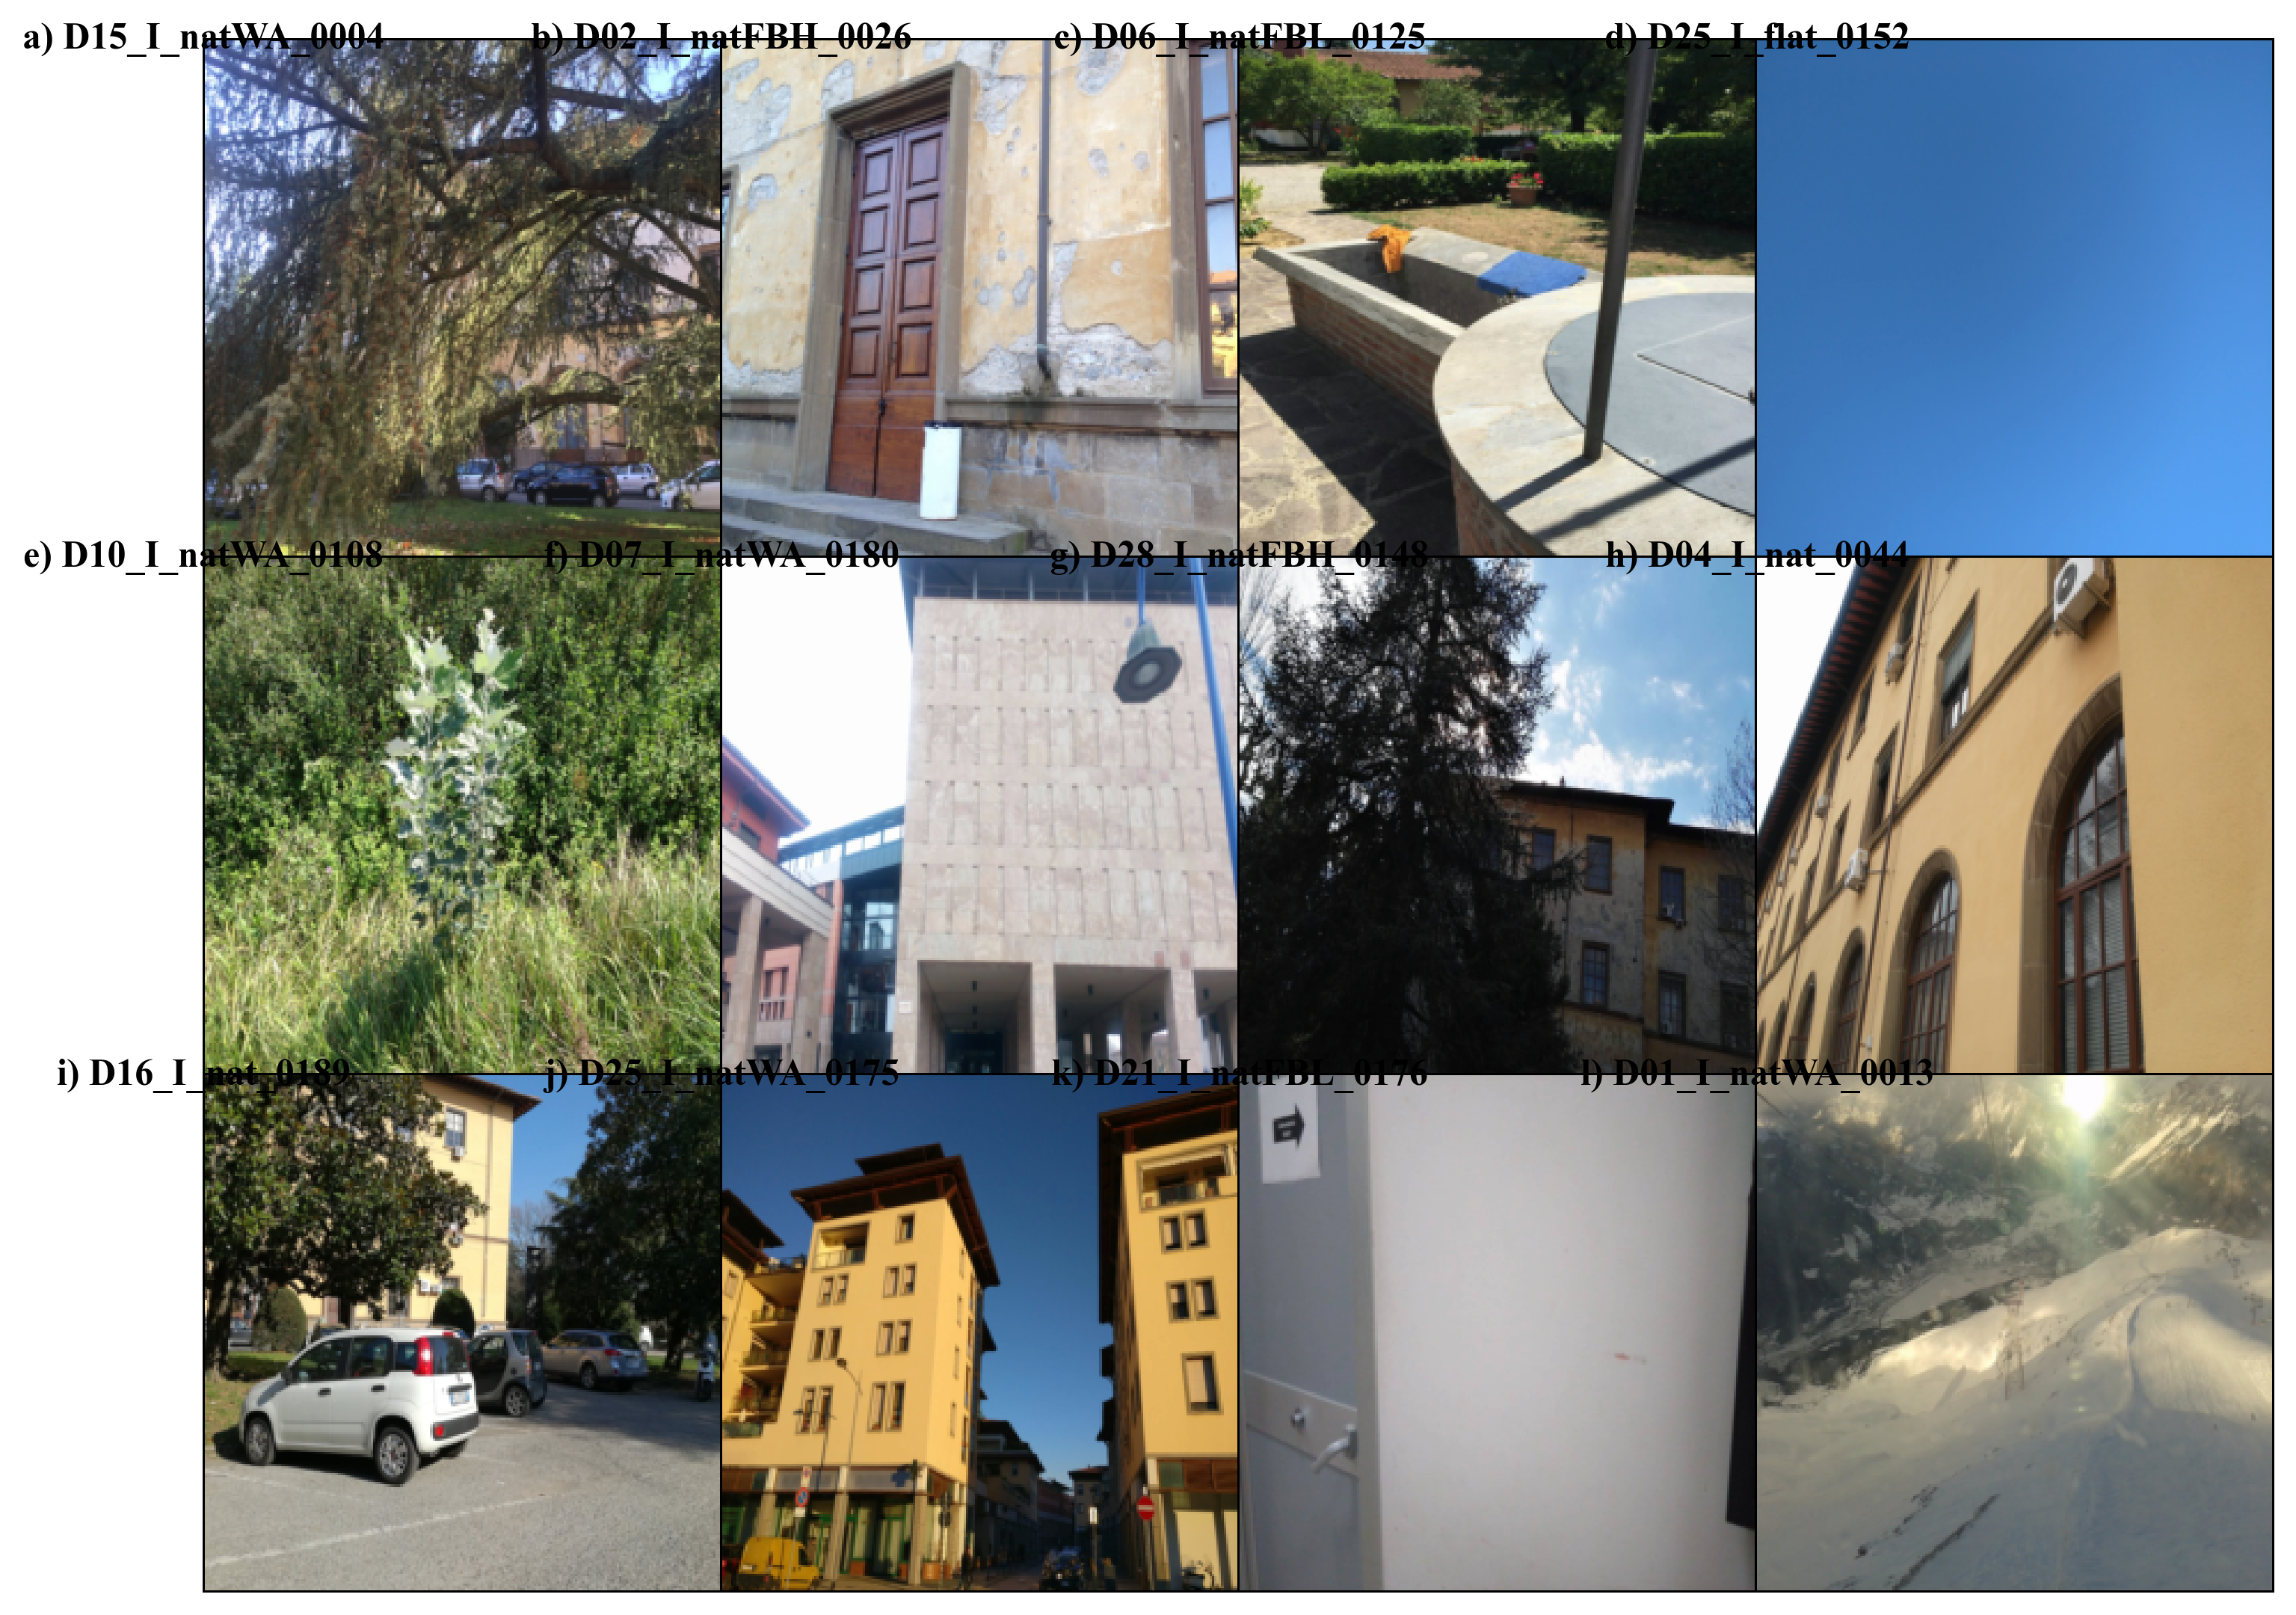

In [ ]:
import matplotlib.pyplot as plt
import random
import torchvision.transforms.functional as F
from torchvision.utils import make_grid
import os

# Function to unnormalize and convert a tensor to PIL image
def unnormalize_and_convert_to_pil(tensor):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    tensor = F.normalize(tensor, [-m/s for m, s in zip(mean, std)], [1/s for s in std])
    return F.to_pil_image(tensor)

# Randomly select 12 images
indices = random.sample(range(len(train_dataset)), 12)
selected_images = [unnormalize_and_convert_to_pil(train_dataset[i][0]) for i in indices]
image_labels = [os.path.splitext(os.path.basename(train_dataset.samples[i][0]))[0] for i in indices]

# Create a grid from the images with padding
grid = make_grid([F.to_tensor(img) for img in selected_images], nrow=4, padding=1)
grid_image = F.to_pil_image(grid)

# Plotting
plt.figure(figsize=(12, 9), dpi=300)
plt.imshow(grid_image)
plt.axis('off')

# Setting titles with labels from 'a' to 'l'
labels = [f'{chr(97 + i)}) {label}' for i, label in enumerate(image_labels)]
for i, label in enumerate(labels):
    x = (i % 4) * (grid_image.width / 4)
    y = (i // 4) * (grid_image.height / 3)
    plt.text(x, y, label, ha='center', va='center', fontsize=12, fontweight='bold', fontname='Times New Roman')

# Save the figure
output_folder = "../output/"
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, "selected_training_images.jpg"), dpi=300, bbox_inches='tight')

plt.show()
